In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("C:/Users/sikho/Downloads/retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   category      
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   category      
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


In [8]:
# summary of dataset

df.describe(include='all')

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [10]:
# column convert to lowercase format and space replace with (_)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [11]:
# duplicated rows
df.duplicated().sum()

0

In [14]:
# change data types
df['date'] = pd.to_datetime(df['date'])
df['gender'] = df['gender'].astype('category')
df['product_category'] = df['product_category'].astype('category')
df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                    category
age                          int64
product_category          category
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

In [15]:
df2 = df

In [16]:
# gender count
df['gender'].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

<Axes: ylabel='count'>

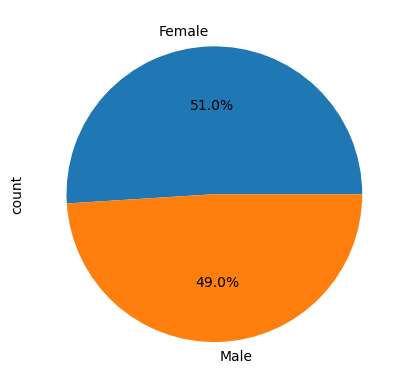

In [21]:
# pie chart
df2['gender'].value_counts().plot(kind='pie', autopct='%.1f%%')

In [22]:
# frequency of product_category
df2['product_category'].value_counts()

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='product_category'>

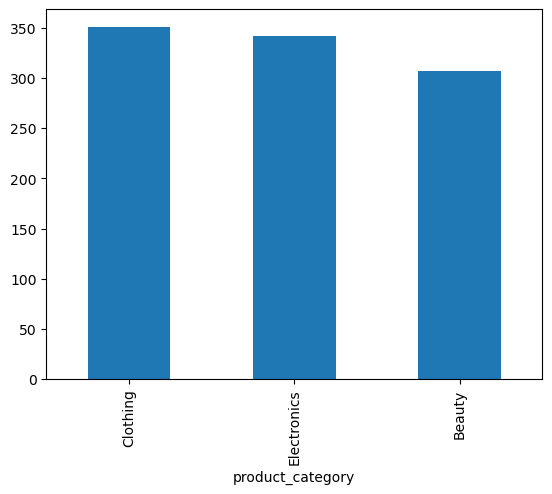

In [23]:
df2['product_category'].value_counts().plot(kind='bar')

In [24]:
df['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

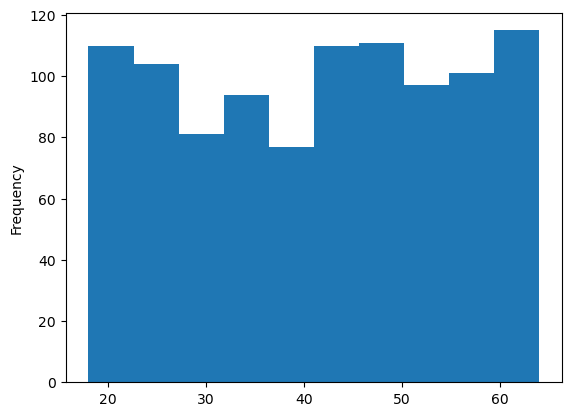

In [25]:
df2['age'].plot(kind='hist')

In [26]:
df2['age'].skew()

-0.04881245380328967

In [27]:
df['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

<Axes: xlabel='quantity'>

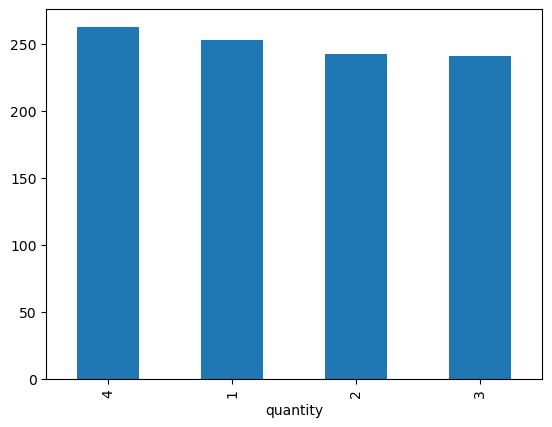

In [29]:
df2['quantity'].value_counts().plot(kind='bar')

In [30]:
df['price_per_unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

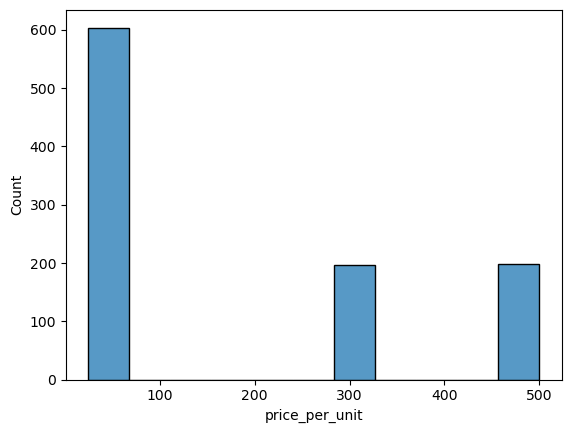

In [31]:
sns.histplot(df2, x='price_per_unit')
plt.show()

In [34]:
# stats
df2['total_amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64

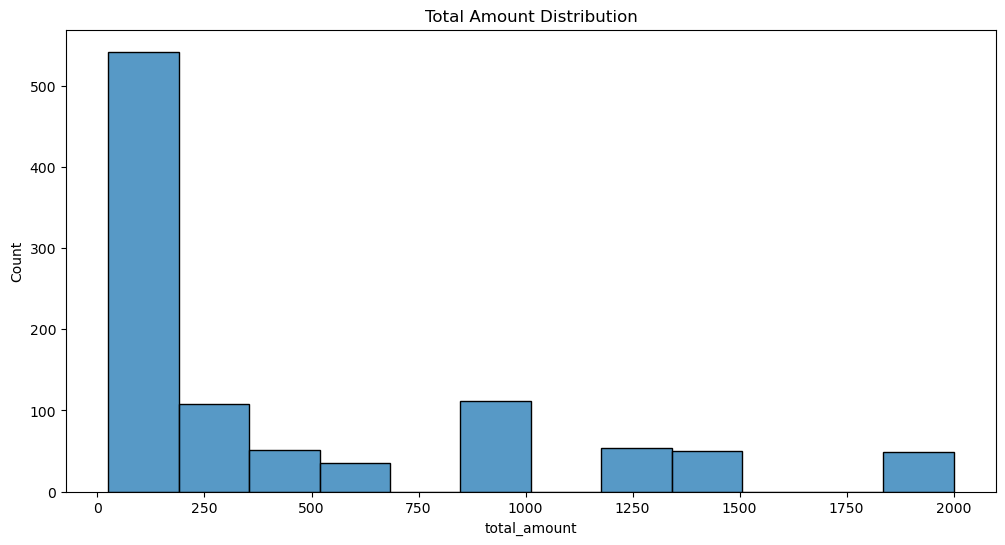

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df2['total_amount'])
plt.title('Total Amount Distribution')
plt.show()

<Axes: xlabel='age', ylabel='total_amount'>

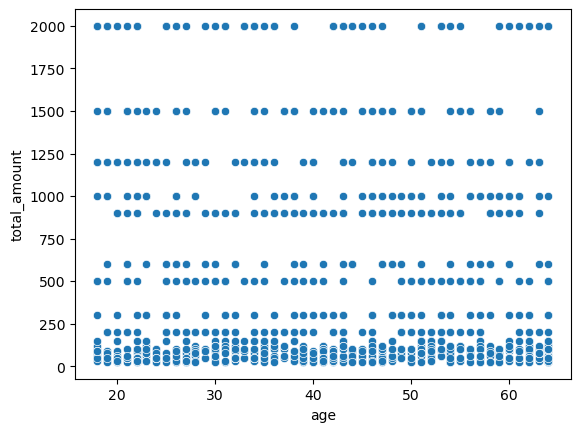

In [39]:
# scatterplot between age and total_amount
sns.scatterplot(df2, x='age', y='total_amount')

In [40]:
df2['age'].corr(df['total_amount'])

-0.06056802388304562

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

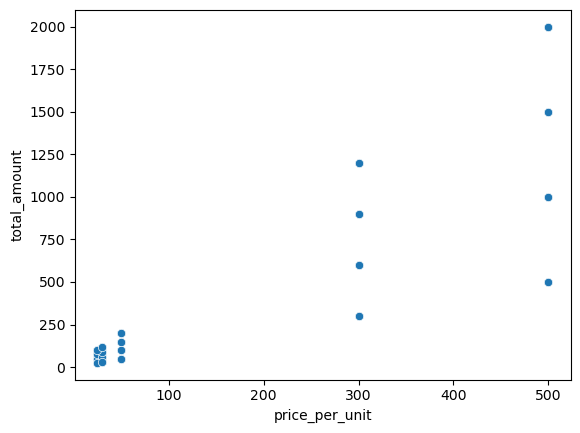

In [42]:
sns.scatterplot(df2, x='price_per_unit', y='total_amount')

In [43]:
df2['price_per_unit'].corr(df['total_amount'])

0.8519248403554038

In [44]:
pd.crosstab(df['gender'], df['product_category'])

product_category,Beauty,Clothing,Electronics
gender,,,
Female,166,174,170
Male,141,177,172


In [45]:
pd.crosstab(df['gender'], df['quantity'])

quantity,1,2,3,4
gender,,,,
Female,125,120,127,138
Male,128,123,114,125


In [46]:
pd.crosstab(df['product_category'], df['quantity'])

quantity,1,2,3,4
product_category,,,,
Beauty,74,75,85,73
Clothing,88,80,86,97
Electronics,91,88,70,93


In [47]:
pd.crosstab(df['gender'], df['price_per_unit'])

price_per_unit,25,30,50,300,500
gender,,,,,
Female,115,92,98,106,99
Male,95,91,113,91,100


<Axes: xlabel='date'>

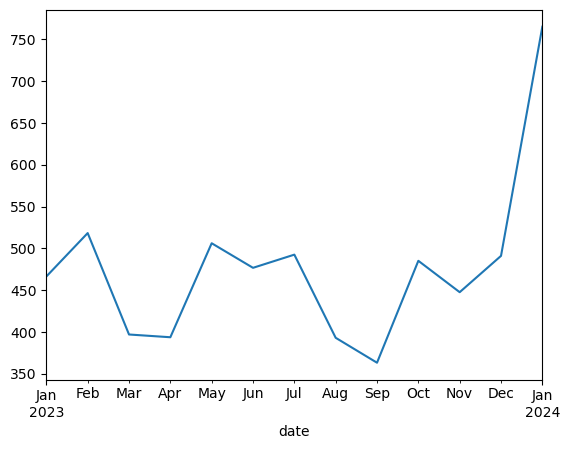

In [53]:
df2.set_index('date', inplace=True)

monthly_window = df2['total_amount'].resample('M').mean()
monthly_window.plot()

<Axes: xlabel='date'>

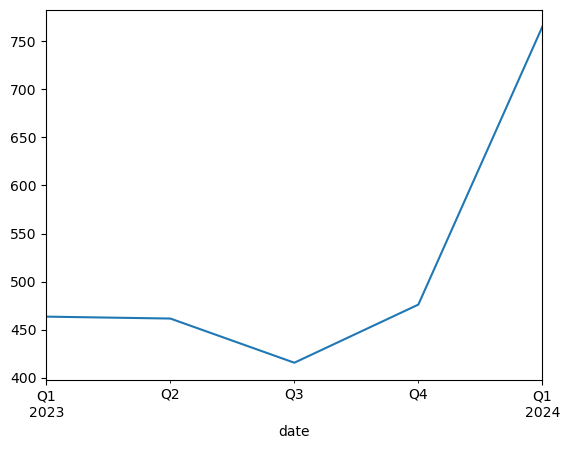

In [56]:
quarterly_window = df['total_amount'].resample('Q').mean()
quarterly_window.plot()

# Recommendations

### Customer Segmentation and Product Preferences:
#### Gender-Based Marketing Strategies:
Tailor marketing campaigns to resonate with the slightly higher female customer base.
Highlight clothing, beauty, and electronics products in marketing materials, focusing on features that appeal to both genders.
#### Product Category Optimization:
Allocate resources to enhance the clothing category's offerings since it's the most popular.
Conduct market research to identify potential trends or shifts in customer preferences within the clothing, electronics, and beauty categories.
#### Personalized Product Recommendations:
Implement personalized recommendation systems based on gender and past purchase behavior to enhance customer experience and increase sales.

### Pricing and Spending Patterns:
#### Dynamic Pricing Strategies:
Consider implementing dynamic pricing models, especially for products with distinct price points, to capitalize on the strong positive correlation between price per unit and total amount spent.
Utilize pricing analytics tools to optimize pricing strategies across different product categories and price ranges.
#### Promotions and Discounts:
Offer promotions or discounts targeting specific price ranges to encourage higher spending, especially within the 50 and 300 price per unit categories where both genders show significant purchasing activity.

### Inventory and Sales Management:
#### Inventory Management Optimization:
Adjust inventory levels based on the observed quantity distribution, with a focus on maintaining adequate stock for quantities of 4, which are most commonly purchased across different categories.
#### Sales Forecasting and Planning:
Utilize historical sales data to forecast demand for each product category, adjusting inventory levels and marketing strategies accordingly.
Monitor quarterly total amounts trends closely and identify underlying drivers behind fluctuations and spikes to enhance sales forecasting accuracy.

### Market Analysis and Expansion:
#### Market Expansion Opportunities:
Explore opportunities to expand product offerings or enter new markets based on customer demographics and purchasing behaviors.
Conduct market segmentation analysis to identify niche markets or untapped customer segments for targeted marketing efforts.